<a href="https://colab.research.google.com/github/cmyhre2/ML_RegressionModels_CTM/blob/main/LR_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In-Class Assignment: Exploring Regression Techniques
Objective:
The goal of this assignment is to apply five regression techniques—Multiple Linear Regression (MLR), Stochastic Gradient Descent (SGD), Ridge Regression, Lasso Regression, and Polynomial Regression—on a from Kaggle. You will compare the performance of these models and interpret the results.
https://www.kaggle.com/datasets/CooperUnion/cardataset

### Import necessary libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load a dataset
data=pd.read_csv('/content/drive/MyDrive/CS430/data.csv')

In [ ]:
# Check data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

## What are the basic properties of the dataset

- What is the shape of the dataset (number of rows and columns)?
- What are the column names, and what do they represent?
- What is the data type of each column?

In [ ]:
print('Data Shape:',data.shape)
# what are the column names and data types?
print(data.dtypes)

Data Shape: (11914, 16)
Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object


### Missing Data
- Are there any missing values in the dataset?
- Which columns have missing values, and how many?

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

### Missing Data:
After checking the column info of the data, it appears some data is missing in some columns. My approach to solving this problem is to simply remove missing values after I get all the outliers and duplicate values first.

### Descriptive Statistics:
- What are the summary statistics of the numerical columns?
- What are the mean, median, min, max, and standard deviation of the numerical columns?

In [ ]:
# Summarize the data
data.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


### Target Variable:
How is the target variable distributed?

If the target variable is numerical (e.g., house prices, car prices or insurance charges), plot a histogram to visualize its distribution.

<Axes: xlabel='MSRP', ylabel='Count'>

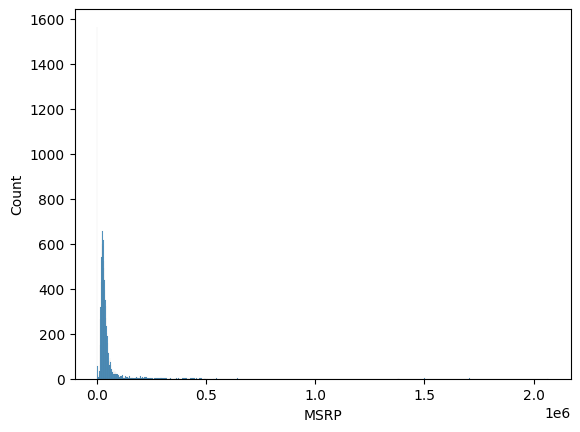

In [ ]:
# How is price distributed?
sns.histplot(data['MSRP'])

### Relationships Between Features:
- Are there correlations between the numerical variables?

- Are there features that are highly correlated (positively or negatively)?
- How does each feature correlate with the target variable?

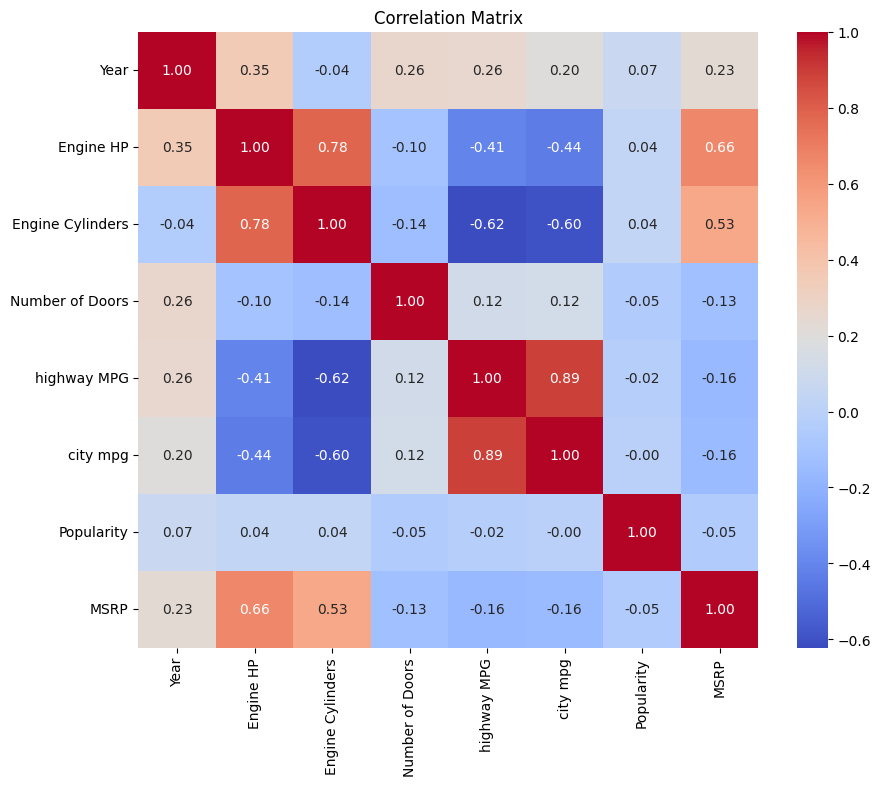

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

In [ ]:
numerical_data = data.select_dtypes(include=[np.number])
correlation_matrix = numerical_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()
plt

### Are there any potential outliers in the dataset?
- Use boxplots or scatter plots to identify potential outliers.
- Should outliers be removed or dealt with in some other way?

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


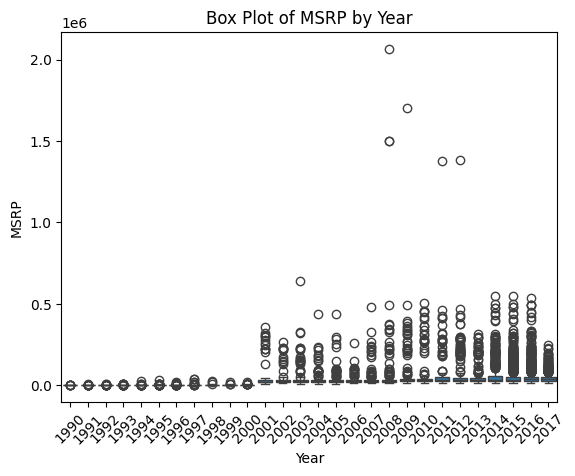

In [ ]:
# Box Plot: Distribution of 'Price' by 'Category'
sns.boxplot(x=data["Year"],y=data["MSRP"])


plt.title('Box Plot of MSRP by Year')
plt.xticks(rotation=45)
plt.show()

### Data Cleaning:
- Are there any issues in the data that need to be cleaned?
>Yes, some of the rows have missing data.
- Are there duplicated rows that should be removed?
>Yes, 715 duplicate rows exist.

In [ ]:
# remove outliers in data
df_data = data.copy()
# Create the dataframe
df_data.head()
print("Old Shape: ", df_data.shape)

# IQR
# Calculate the upper and lower limits
Q1 = df_data['MSRP'].quantile(0.25)
Q3 = df_data['MSRP'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(df_data['MSRP'] >= upper)[0]
lower_array = np.where(df_data['MSRP'] <= lower)[0]

# Removing the outliers
df_data.drop(index=upper_array, inplace=True)
df_data.drop(index=lower_array, inplace=True)

# Print the new shape of the DataFrame
print("New Shape: ", df_data.shape)

Old Shape:  (11914, 16)
New Shape:  (10918, 16)


In [ ]:
print("Total duplicate values are '", data.duplicated().sum(), "'.")
data.drop_duplicates(inplace=True, keep="first")

Total duplicate values are ' 0 '.


In [ ]:
# drop rows with missing market category
data.dropna(subset=['Market Category'], inplace=True)
data.dropna(subset=['Number of Doors'], inplace=True)
data.dropna(subset=['Engine Fuel Type'], inplace=True)
data.dropna(subset=['Engine HP'], inplace=True)
data.dropna(subset=['Engine Cylinders'], inplace=True)
data.dropna(subset=['Number of Doors'], inplace=True)
data.dropna(subset=['Market Category'], inplace=True)
data.shape

(7735, 16)

### Split into features and target

In [ ]:
data.dtypes
X = data.drop('MSRP', axis=1)
y = data['MSRP']

### Feature Engineering

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer

In [ ]:
# Identify numerical and categorical columns
numerical_features = ['Year','Engine HP','Engine Cylinders','highway MPG','city mpg','Popularity','Number of Doors']
categorical_features = ['Make','Model','Engine Fuel Type','Driven_Wheels','Market Category','Vehicle Size','Vehicle Style','Transmission Type']


### Preprocessing Pipelines

In [ ]:
# Preprocessing pipeline for numerical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('scaler', StandardScaler())  # Standardize features
])

# Preprocessing pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encoding
])

# Combine preprocessing for both numerical and categorical features
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])




### Create a function to build and evaluate models using pipelines

In [ ]:

def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Fit the model
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred = model.predict(X_test)

    # Evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Model: {model.named_steps['model'].__class__.__name__}")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"R² Score: {r2:.4f}")
    print('-' * 50)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model pipelines

In [ ]:
# Linear Regression Pipeline
linear_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Ridge Regression Pipeline
ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Ridge(alpha=1.0))
])

# Lasso Regression Pipeline
lasso_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Lasso(max_iter=5000, alpha=0.1))
])

# Stochastic Gradient Descent (SGD) Pipeline
sgd_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', SGDRegressor(max_iter=1000, tol=1e-3))
])
# Polynomial Regression Pipeline (degree=2)
polynomial_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', LinearRegression())
])



### Evaluate all models

In [ ]:

for model in [linear_pipeline, ridge_pipeline, lasso_pipeline, sgd_pipeline, polynomial_pipeline]:
    evaluate_model(model, X_train, X_test, y_train, y_test)

Model: LinearRegression
Mean Squared Error: 1000104322.3801
R² Score: 0.8210
--------------------------------------------------
Model: Ridge
Mean Squared Error: 1095309239.8828
R² Score: 0.8040
--------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28503602108.414673, tolerance: 3093585417.962334
  model = cd_fast.sparse_enet_coordinate_descent(


Model: Lasso
Mean Squared Error: 1130484577.5239
R² Score: 0.7977
--------------------------------------------------
Model: SGDRegressor
Mean Squared Error: 1438098502.9687
R² Score: 0.7426
--------------------------------------------------
Model: LinearRegression
Mean Squared Error: 921516417.9327
R² Score: 0.8351
--------------------------------------------------


### Interpretation:
Discuss the effectiveness of each model. Which model performed the best and why?

### Interpretation Conclusion:
Each model seems to vary in mean squared error and in R^2 value. The SGDRegressor model seems to have the highest mean squared error while having the lowest R^2 value. This model performed the worst in terms of mean squared error while performing the best in terms if R^2, having the lowest R^2 value (percentage of error not explained by model). The LinearRegression model seems to have performed the best in terms of mean squared error, the lowest of the five models while having the highest R^2 value. In terms of R^2 value, this model performed the worst by having the highest R^2 value.